In [ ]:
# Packages et outils de base
import sys
import os
import datetime
from time import time
import json
import random
import glob

# Traitement et analyse des données
import numpy as np
import pandas as pd
import seaborn as sns

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

# Traitement d'image
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
import cv2

# Modèles vectoriels de mots
import gensim
from gensim.models import KeyedVectors
import gensim.downloader as gensim_api

# machine learning
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, accuracy_score, classification_report
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.spatial import distance
from yellowbrick.cluster import SilhouetteVisualizer

# deep learning avec TensorFlow et Keras
import tensorflow as tf
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.preprocessing import image


In [241]:
data = pd.read_pickle('data/cleaned/df_clean1.pkl')
path_to_images = "./data/source/Flipkart/images/"

In [242]:
data.head()

uniq_id                                 image   
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg  \
1  7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                        product_name          brand   
0  elegance polyester multicolor abstract eyelet ...       elegance  \
1                                  cotton bath towel                  
2                            cotton terry face towel                  
3     royal fashion cotton printed king sized double  royal fashion   
4                    cotton floral king sized double                  

                                         description    main_category   
0  key elegance polyester multicolor abstract eye...  Home Furnishing  \
1  cotton bath towel bath towel red yellow blue b...        Baby Care   
2  key cotton terry face towel size small height ...        Baby Care   
3  key royal fashion cotton printed king sized do...  Home Furnishing   
4  key cotton floral king sized double cotton flo...  Home Furnishing   

            sub_category1     sub_category2   
0  Curtains & Accessories          Curtains  \
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                            combined  
0  elegance polyester abstract eyelet door curtai...  
1  cotton bath towel cotton bath towel bath towel...  
2  cotton terry face towel cotton terry face towe...  
3  royal fashion cotton printed king sized double...  
4  cotton floral king sized double cotton floral ...

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uniq_id        1050 non-null   object
 1   image          1050 non-null   object
 2   product_name   1050 non-null   object
 3   brand          1050 non-null   object
 4   description    1050 non-null   object
 5   main_category  1050 non-null   object
 6   sub_category1  1050 non-null   object
 7   sub_category2  1050 non-null   object
 8   combined       1050 non-null   object
dtypes: object(9)
memory usage: 74.0+ KB


In [244]:
image_files = os.listdir(path_to_images)
print(image_files[:20])


['aa68675f50a0551b8dadb954017a50a1.jpg', '037c2402fee39fbc80433935711d1383.jpg', '42643c1c9403f67921a18654bcf45ead.jpg', '53f4bc7d7321f5c41de6b86e41f13e80.jpg', 'b144a363c107c7bdd91f32d6e28ba6f2.jpg', 'db3e2eeb4fe90d4755f2911d661eae95.jpg', '9a9402ad55d079c86c302521816b7b0e.jpg', '42a8fef62716772c391fbdd148cc9c16.jpg', '503bb08f7bdf6a395ec564dd1dc83619.jpg', '42770faa04bfcf2b62e7ef335e1b1965.jpg', '9c4ab8ab059c912090c83cb0818e7f1c.jpg', 'f2fa99bfaa4aa65a2bd53337e140f949.jpg', 'a618354ba17cff64826558d81afc77ab.jpg', 'c063d07d78a55a21bf6c0e7c8ae46a6d.jpg', 'e99d9abb115a9bd580bcccf9ff4d4881.jpg', '1d829e0eac91d7e85cdd6d581c363360.jpg', '5c7b493625b5fc6689cae49d25e1ae17.jpg', '06749cbff1487f470438823f6952cfd1.jpg', 'ab3f4b2d2ec007b7e0eaec213bfdbffc.jpg', '473b1ab1abe21826c41efa1584a88a63.jpg']


In [245]:
print(f"Number of images in the folder: {len(image_files)}")

Number of images in the folder: 1050


In [251]:
def get_image_info(i):
    # Téléchargement d'une image
    #path_to_image = os.path.join(path_to_images, os.listdir(path_to_images)[i]) 
    path_to_image = os.path.join(path_to_images, image_files[i])
    img = Image.open(path_to_image)

    # Obtenir des informations sur l'image
    format_img = img.format  # Format d'image
    size_img = img.size  # Dimensions de l'image
    file_size = os.path.getsize(path_to_image)  # Taille du fichier
    mode_img = img.mode

    print(f"Format d'image: {format_img}")
    print(f"Dimensions de l'image: {size_img}")
    print(f"Taille du fichier: {file_size} ")
    print(f"Mode  de l'image: {mode_img} ")
    plt.imshow(img)
    plt.axis('off')  ### désactiver l'affichage des axes de coordonnées
    plt.show()
    return format_img, size_img, file_size

Format d'image: JPEG
Dimensions de l'image: (920, 1100)
Taille du fichier: 230583 
Mode  de l'image: RGB 


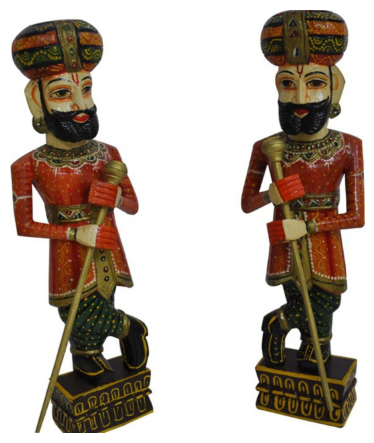

('JPEG', (920, 1100), 230583)

In [252]:
get_image_info(10)

Format d'image: JPEG
Dimensions de l'image: (1100, 914)
Taille du fichier: 275273 
Mode  de l'image: RGB 


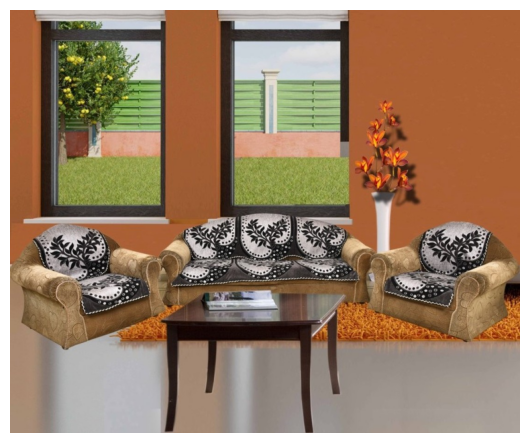

('JPEG', (1100, 914), 275273)

In [253]:
get_image_info(5)

Format d'image: JPEG
Dimensions de l'image: (1280, 1248)
Taille du fichier: 230617 
Mode  de l'image: RGB 


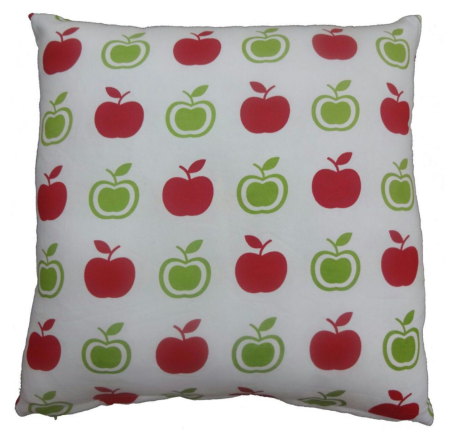

('JPEG', (1280, 1248), 230617)

In [254]:
get_image_info(100)

Format d'image: JPEG
Dimensions de l'image: (552, 734)
Taille du fichier: 130032 
Mode  de l'image: RGB 


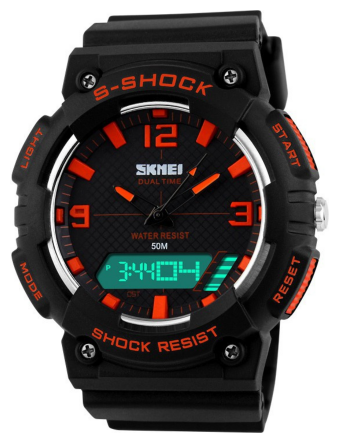

('JPEG', (552, 734), 130032)

In [255]:
get_image_info(1000)

### Toutes les images ont de tailles différentes

In [27]:
#Affichage d'exemples d'images par label

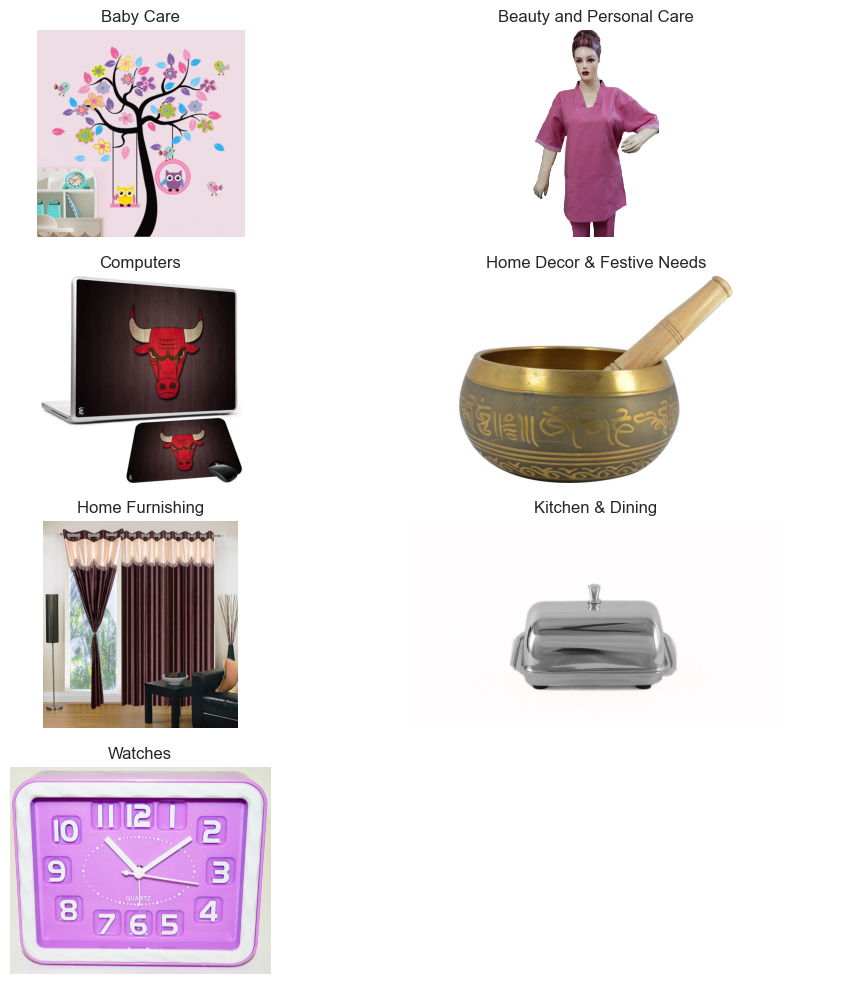

In [256]:
sample_data = data.groupby('main_category').last().reset_index()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

for ax, row in zip(axes.ravel(), sample_data.itertuples()):
    img_path = path_to_images + row.image
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off') 
    ax.set_title(row.main_category)
    axes[3, 1].axis('off')

plt.tight_layout()
plt.show()


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uniq_id        1050 non-null   object
 1   image          1050 non-null   object
 2   product_name   1050 non-null   object
 3   brand          1050 non-null   object
 4   description    1050 non-null   object
 5   main_category  1050 non-null   object
 6   sub_category1  1050 non-null   object
 7   sub_category2  1050 non-null   object
 8   combined       1050 non-null   object
dtypes: object(9)
memory usage: 74.0+ KB


In [ ]:
'''
La méthodoligie d'extraction de features par SIFT se fait en 4 étapes :

Récupérer les descripteurs de chaque image par un algorithme de type SIFT;
Clusteriser l'ensemble de tous les descripteurs;
Associer les descripteurs de chaque image aux centres obtenus par clustering;
Construction des histogrammes.
'''

#  BoVW

# 1. PILLOW

In [14]:
def add_padding(img, target_size=(224, 224)):
    """Ajouter des marges à l'image pour obtenir la taille souhaitée."""
    
    # Déterminez le plus grand côté et redimensionnez l'image pour que le plus grand côté soit de 224.
    if img.width > img.height:
        aspect_ratio = target_size[0] / img.width
        new_height = int(img.height * aspect_ratio)
        img = img.resize((target_size[0], new_height))
    else:
        aspect_ratio = target_size[1] / img.height
        new_width = int(img.width * aspect_ratio)
        img = img.resize((new_width, target_size[1]))
    
    # Ajoutez des marges blanches sur le côté le plus petit pour qu'il atteigne une taille de 224.
    delta_w = target_size[0] - img.width
    delta_h = target_size[1] - img.height
    padding = (delta_w // 2, delta_h // 2, delta_w - (delta_w // 2), delta_h - (delta_h // 2))
    
    return ImageOps.expand(img, padding, fill="white")


In [15]:
def enhance_image(img):
    """Amélioration supplémentaire de l'image."""
    contrast = ImageEnhance.Contrast(img)
    img = contrast.enhance(1.1)  # Amélioration du contraste. Les valeurs > 1 augmentent le contraste, < 1 - le diminuent
    
    brightness = ImageEnhance.Brightness(img)
    img = brightness.enhance(1.1)  # Réglage de la luminosité
    
    color = ImageEnhance.Color(img)
    img = color.enhance(1.2)  # Augmentation de la saturation des couleurs
    
    return img

def preprocess_and_save_images(df, source_path, save_path, target_size=(224, 224)):
    """
    Prétraitement des images (contraste, égalisation, flou) et sauvegarde dans le répertoire spécifié.
    
    Parameters:
    - df: DataFrame qui contient les noms des fichiers image.
    - source_path: le chemin d'accès au répertoire source de l'image.
    - save_path: le chemin d'accès au répertoire où stocker les images traitées.
    - target_size: la taille d'image préférée pour ajouter des marges.
    """
    
    for name_img in df["image"]:
        img = Image.open(os.path.join(source_path, name_img))
        img = enhance_image(img)  
        img = ImageOps.autocontrast(img, cutoff=2)  # Utilisation du contraste automatique, mais avec moins d'intensité (cutoff=2)
        img = ImageOps.equalize(img)
        #img = img.filter(ImageFilter.BoxBlur(1))  # image floue
        img = img.filter(ImageFilter.GaussianBlur(radius=1))
        img = add_padding(img, target_size)
        img.save(os.path.join(save_path, name_img))


In [16]:
path = "./data/source/Flipkart/"
dir_images_transformed = "./data/transformed_images/"

if not os.path.exists(dir_images_transformed):
    os.makedirs(dir_images_transformed)

preprocess_and_save_images(data, path + "images/", dir_images_transformed)



/Users/innakonar/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [17]:
#Comparaison des images traitées et originales
def compare_images(data, path_to_original_images, path_to_transformed_images):
    """
    Parameters:
    - data: DataFrameavec des informations sur les images.
    - path_to_original_images: le chemin d'accès au dossier d'images d'origine.
    - path_to_transformed_images:le chemin d'accès au dossier contenant les images traitées.
    """
    
    # exemples d'images pour chaque catégorie
    sample_data = data.groupby('main_category').last().reset_index()

    # grille d'affichage des images
    fig, axes = plt.subplots(nrows=len(sample_data), ncols=2, figsize=(10, len(sample_data)*2))

    for i, row in enumerate(sample_data.itertuples()):
        # Image originale
        img_path_original = path_to_original_images + row.image
        img_path_transformed = path_to_transformed_images + row.image
        
        # Image traitée
        img_original = mpimg.imread(img_path_original)
        img_transformed = mpimg.imread(img_path_transformed)
        
        # Afficher l'image originale
        axes[i, 0].imshow(img_original)
        axes[i, 0].axis('off')
        axes[i, 0].set_title('Original - ' + row.main_category)
        
        # Affichage de l'image traitée
        axes[i, 1].imshow(img_transformed)
        axes[i, 1].axis('off')
        axes[i, 1].set_title('Transformed - ' + row.main_category)

    plt.tight_layout()
    plt.show()


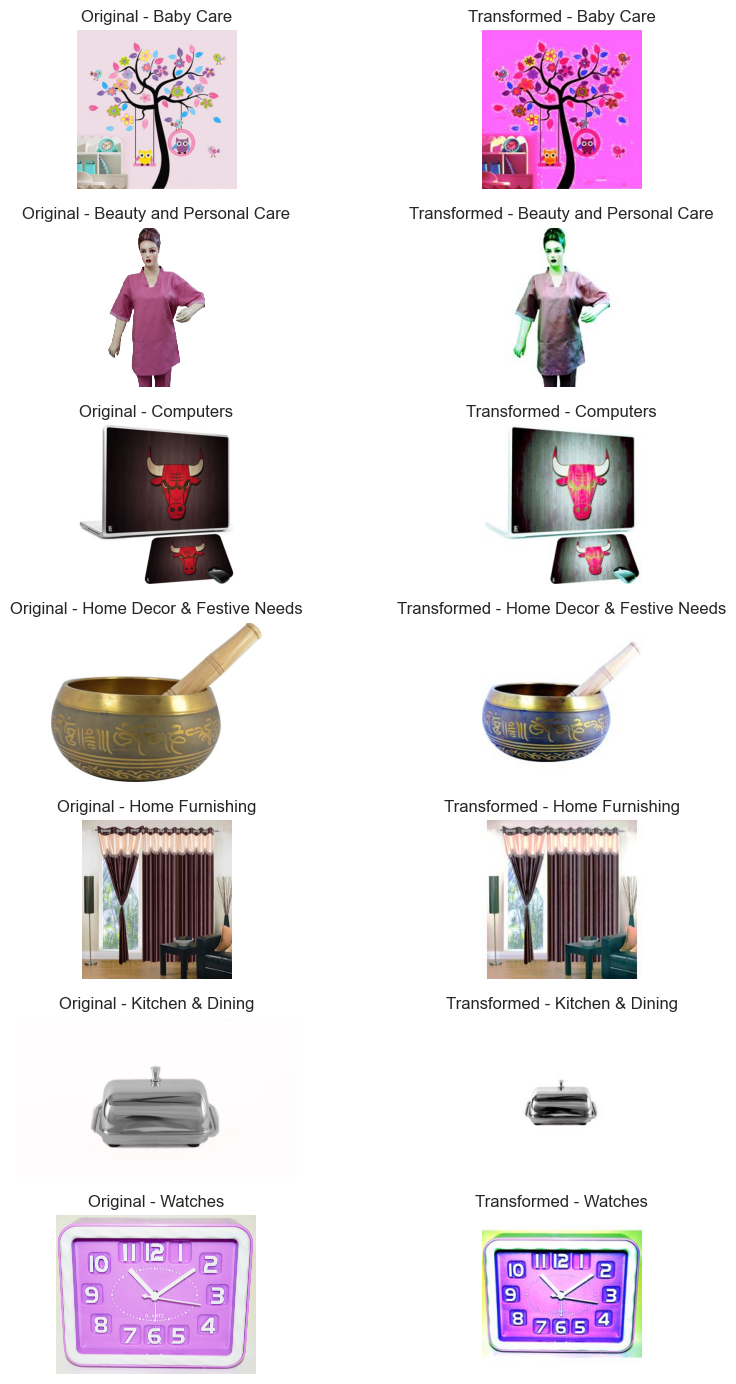

In [18]:
compare_images(data, path_to_images, dir_images_transformed)


# 2. OpenCV (cv2)

In [24]:
def autocontrast(img, clip_limit=2.0):
    """Utilisation de CLAHE pour une amélioration automatique du contraste."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
    cl1 = clahe.apply(gray)
    return cv2.cvtColor(cl1, cv2.COLOR_GRAY2BGR)
# def autocontrast(img, clip_limit=2.0):
#     """Utilisation de CLAHE pour une amélioration automatique du contraste."""
#     clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
#     channels = cv2.split(img)
#     eq_channels = [clahe.apply(ch) for ch in channels]
#     return cv2.merge(eq_channels)

def add_padding_cv2(img, target_size):
    """Ajout de marges à l'image pour obtenir la taille souhaitée."""
    color = [255, 255, 255] # white
    h, w = img.shape[:2]
    
    if w > h:
        new_w = target_size[0]
        new_h = int(h * (new_w / w))
    else:
        new_h = target_size[1]
        new_w = int(w * (new_h / h))

    resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    top = (target_size[1] - new_h) // 2
    bottom = target_size[1] - new_h - top
    left = (target_size[0] - new_w) // 2
    right = target_size[0] - new_w - left

    return cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

def equalize_color_image(img):
    """Alignement de l'histogramme pour une image couleur."""
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))
    eq_image = cv2.merge(eq_channels)
    return eq_image
def preprocess_and_save_images_cv2(df, source_path, save_path, target_size=(224, 224)):
    ksize = 5  
    sigmaX = 0 
    for name_img in df["image"]:
        img = cv2.imread(os.path.join(source_path, name_img))
        img = equalize_color_image(img)
        img = autocontrast(img)
        img = cv2.GaussianBlur(img, (ksize, ksize), sigmaX)
        img = add_padding_cv2(img, target_size)
        cv2.imwrite(os.path.join(save_path, name_img), img)






In [25]:
source_path = "./data/source/Flipkart/images/"
directory_name = "./data/processed_images/"

if not os.path.exists(directory_name):
    os.makedirs(directory_name)
    
preprocess_and_save_images_cv2(data, source_path, directory_name)


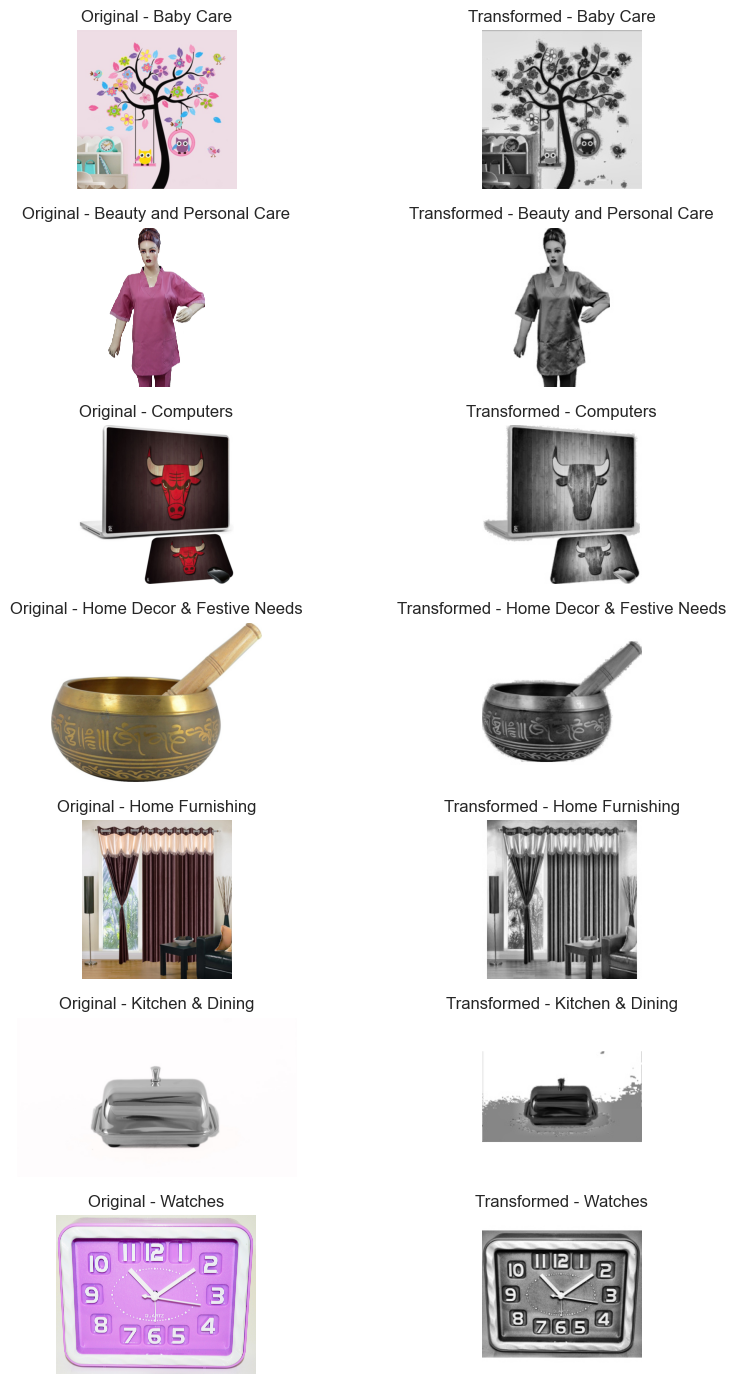

In [26]:
compare_images(data, path_to_images, directory_name)


In [27]:
# def autocontrast(img, clip_limit=2.0):
#     """Utilisation de CLAHE pour une amélioration automatique du contraste."""
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
#     cl1 = clahe.apply(gray)
#     return cv2.cvtColor(cl1, cv2.COLOR_GRAY2BGR)

def autocontrast(img, clip_limit=2.0):
    """Utilisation de CLAHE pour une amélioration automatique du contraste."""
    
    # BGR => LAB
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    #Division en canaux LAB
    l, a, b = cv2.split(lab)
    
    # Créer un objet CLAHE et l'appliquer au canal L
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    
    # Combinaison du canal L modifié avec les canaux A et B
    limg = cv2.merge((cl, a, b))
    
    # LAB => BGR
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def detect_edges(gray, low_threshold=50, high_threshold=150):
    """Detect edges in the gray image using Canny detector."""
    edges = cv2.Canny(gray, low_threshold, high_threshold)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)


def add_padding_cv2(img, target_size):
    """Ajout de marges à l'image pour obtenir la taille souhaitée."""
    color = [255, 255, 255] # white
    h, w = img.shape[:2]
    
    if w > h:
        new_w = target_size[0]
        new_h = int(h * (new_w / w))
    else:
        new_h = target_size[1]
        new_w = int(w * (new_h / h))

    resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    top = (target_size[1] - new_h) // 2
    bottom = target_size[1] - new_h - top
    left = (target_size[0] - new_w) // 2
    right = target_size[0] - new_w - left

    return cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

def equalize_color_image(img):
    """Alignement de l'histogramme pour une image couleur."""
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))
    eq_image = cv2.merge(eq_channels)
    return eq_image

        
def preprocess_and_save_images_cv2(df, source_path, save_path, target_size=(224, 224)):
    ksize = 5  
    sigmaX = 0 
    for name_img in df["image"]:
        img = cv2.imread(os.path.join(source_path, name_img))
        img = equalize_color_image(img)
        img = autocontrast(img)
        img = cv2.GaussianBlur(img, (ksize, ksize), sigmaX)
        #img = detect_edges(img)  
        #img = add_padding_cv2(img, target_size)
        cv2.imwrite(os.path.join(save_path, name_img), img)



In [28]:
source_path = "./data/source/Flipkart/images/"
directory_name2 = "./data/processed_images/"

if not os.path.exists(directory_name):
    os.makedirs(directory_name)
    
preprocess_and_save_images_cv2(data, source_path, directory_name2)


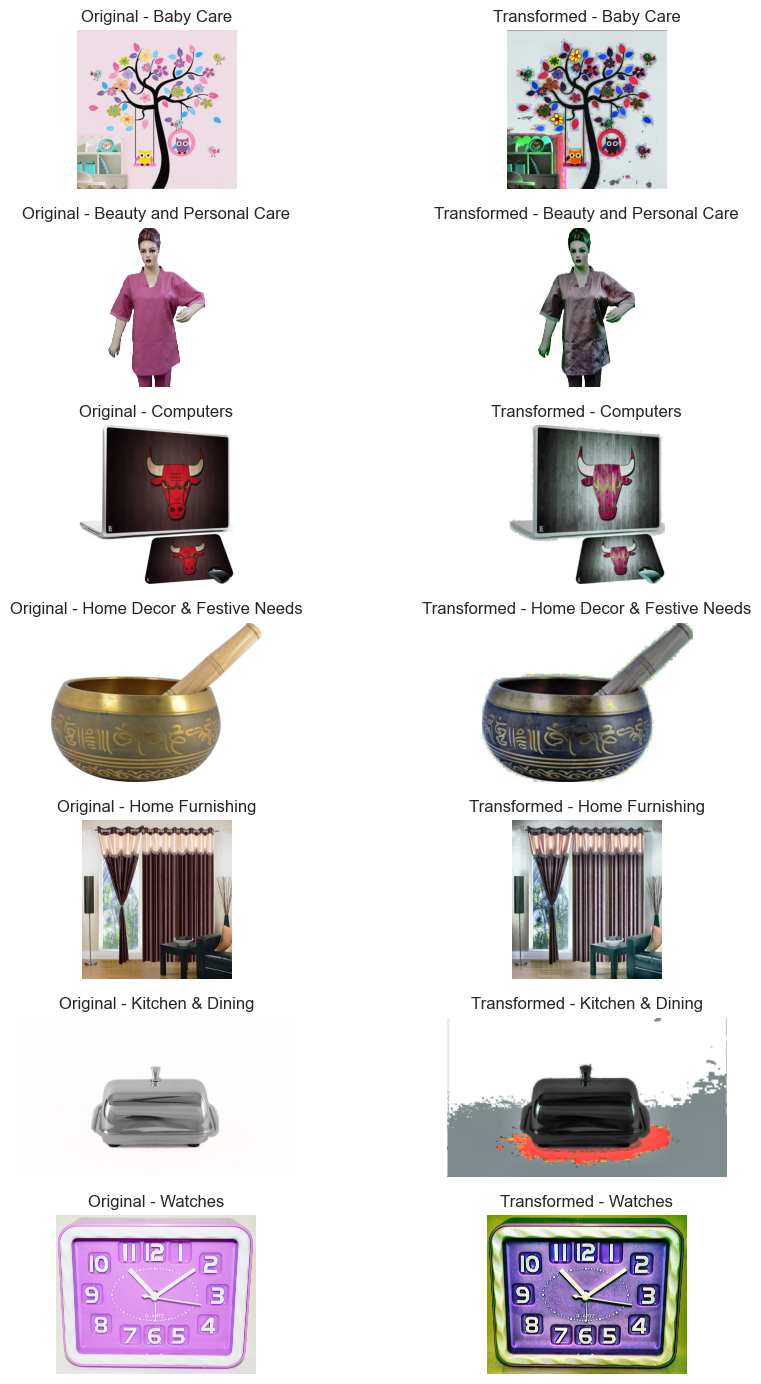

In [29]:
compare_images(data, path_to_images, directory_name2)

# SIFT

Invariance d'échelle : l'une des principales caractéristiques de SIFT est sa capacité à détecter des points clés à différentes échelles d'image. Par conséquent, en théorie, la taille de l’image n’a pas beaucoup d’importance.Les images plus grandes ont une résolution plus élevée, ce qui peut aider à faire ressortir plus de détails et de points clés.

# Pour chaque image, applique l'algorithme SIFT pour détecter les descripteurs.

In [30]:
def sift_features_from_path(image_path):
    """Extraction de points clés et de descripteurs à l'aide de SIFT à partir d'un chemin d'image."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    return kp, des

def generate_sift_features_for_dataframe(df, path_to_images):
    keypoints_dict = {}
    descriptors_dict = {}
    
    for _, row in df.iterrows():
        image_path = path_to_images + row['image']
        kp, des = sift_features_from_path(image_path)
        keypoints_dict[row['uniq_id']] = kp
        descriptors_dict[row['uniq_id']] = des

    return keypoints_dict, descriptors_dict
path_to_processed_images = directory_name2
keypoints, descriptors = generate_sift_features_for_dataframe(data, path_to_images)
data['keypoints'] = data['uniq_id'].map(keypoints)
data['descriptors'] = data['uniq_id'].map(descriptors)


[ WARN:0@1576.113] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


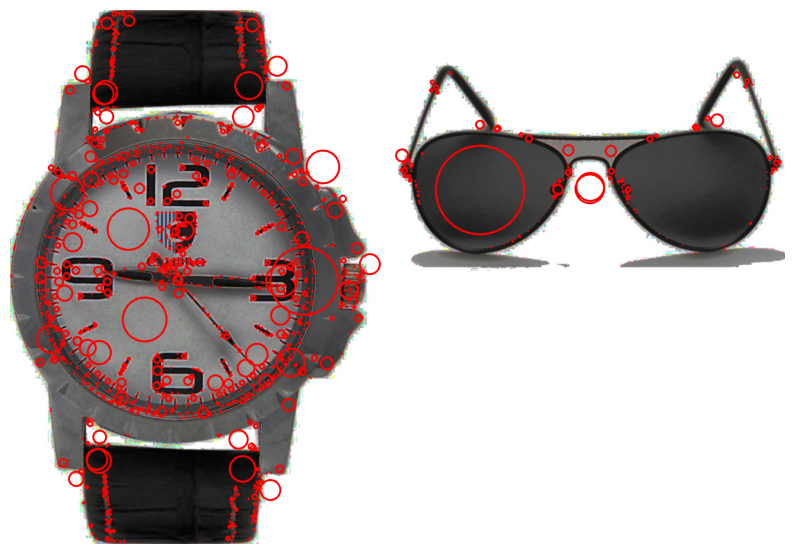

In [32]:
def display_keypoints_on_image(image_path, keypoints):
    """Affiche les points clés de l'image."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

    for keypoint in keypoints:
        x, y = map(int, keypoint.pt)
        radius = int(keypoint.size // 2) 
        cv2.circle(img, (x, y), radius, (255, 0, 0), thickness=4)  
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    plt.close()

sample_image_path = path_to_processed_images + data['image'].iloc[10]
sample_keypoints = keypoints[data['uniq_id'].iloc[10]]

display_keypoints_on_image(sample_image_path, sample_keypoints)



In [33]:
sample_keypoints

(< cv2.KeyPoint 0x7fa71f7f5c00>,
 < cv2.KeyPoint 0x7fa71f7f5cf0>,
 < cv2.KeyPoint 0x7fa71f7f5d20>,
 < cv2.KeyPoint 0x7fa71f7f5c90>,
 < cv2.KeyPoint 0x7fa71f7f5cc0>,
 < cv2.KeyPoint 0x7fa71f7f5c60>,
 < cv2.KeyPoint 0x7fa71f8058a0>,
 < cv2.KeyPoint 0x7fa71f8059c0>,
 < cv2.KeyPoint 0x7fa71f8059f0>,
 < cv2.KeyPoint 0x7fa71f805a20>,
 < cv2.KeyPoint 0x7fa71f805a50>,
 < cv2.KeyPoint 0x7fa71f805a80>,
 < cv2.KeyPoint 0x7fa71f805ab0>,
 < cv2.KeyPoint 0x7fa71f805ae0>,
 < cv2.KeyPoint 0x7fa71f805b10>,
 < cv2.KeyPoint 0x7fa71f805b40>,
 < cv2.KeyPoint 0x7fa71f805b70>,
 < cv2.KeyPoint 0x7fa71f805ba0>,
 < cv2.KeyPoint 0x7fa71f805bd0>,
 < cv2.KeyPoint 0x7fa71f805c00>,
 < cv2.KeyPoint 0x7fa71f805c30>,
 < cv2.KeyPoint 0x7fa71f805c60>,
 < cv2.KeyPoint 0x7fa71f805c90>,
 < cv2.KeyPoint 0x7fa71f805cc0>,
 < cv2.KeyPoint 0x7fa71f805cf0>,
 < cv2.KeyPoint 0x7fa71f805d20>,
 < cv2.KeyPoint 0x7fa71f805d50>,
 < cv2.KeyPoint 0x7fa71f805d80>,
 < cv2.KeyPoint 0x7fa71f805db0>,
 < cv2.KeyPoint 0x7fa71f805de0>,
 < cv2.Key

In [34]:
data.head()

uniq_id                                 image   
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg  \
1  7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                        product_name          brand   
0  elegance polyester multicolor abstract eyelet ...       elegance  \
1                                  cotton bath towel                  
2                            cotton terry face towel                  
3     royal fashion cotton printed king sized double  royal fashion   
4                    cotton floral king sized double                  

                                         description    main_category   
0  key elegance polyester multicolor abstract eye...  Home Furnishing  \
1  cotton bath towel bath towel red yellow blue b...        Baby Care   
2  key cotton terry face towel size small height ...        Baby Care   
3  key royal fashion cotton printed king sized do...  Home Furnishing   
4  key cotton floral king sized double cotton flo...  Home Furnishing   

            sub_category1     sub_category2   
0  Curtains & Accessories          Curtains  \
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                            combined   
0  elegance polyester abstract eyelet door curtai...  \
1  cotton bath towel cotton bath towel bath towel...   
2  cotton terry face towel cotton terry face towe...   
3  royal fashion cotton printed king sized double...   
4  cotton floral king sized double cotton floral ...   

                                           keypoints   
0  (< cv2.KeyPoint 0x7fa75f636fc0>, < cv2.KeyPoin...  \
1  (< cv2.KeyPoint 0x7fa75f6ce210>, < cv2.KeyPoin...   
2  (< cv2.KeyPoint 0x7fa75efbc630>, < cv2.KeyPoin...   
3  (< cv2.KeyPoint 0x7fa71f019060>, < cv2.KeyPoin...   
4  (< cv2.KeyPoint 0x7fa71f084b10>, < cv2.KeyPoin...   

                                         descriptors  
0  [[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0...  
1  [[19.0, 8.0, 2.0, 6.0, 17.0, 60.0, 27.0, 14.0,...  
2  [[100.0, 28.0, 0.0, 0.0, 2.0, 3.0, 2.0, 7.0, 1...  
3  [[0.0, 0.0, 0.0, 2.0, 7.0, 2.0, 2.0, 0.0, 2.0,...  
4  [[92.0, 9.0, 8.0, 19.0, 4.0, 0.0, 2.0, 58.0, 1...

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uniq_id        1050 non-null   object
 1   image          1050 non-null   object
 2   product_name   1050 non-null   object
 3   brand          1050 non-null   object
 4   description    1050 non-null   object
 5   main_category  1050 non-null   object
 6   sub_category1  1050 non-null   object
 7   sub_category2  1050 non-null   object
 8   combined       1050 non-null   object
 9   keypoints      1050 non-null   object
 10  descriptors    1049 non-null   object
dtypes: object(11)
memory usage: 90.4+ KB


In [36]:
missing_descriptor_row = data[data["descriptors"].isnull()]
print(missing_descriptor_row)


                              uniq_id                                 image   
343  9743e6d1c9f3180483825fe4d2e97836  9743e6d1c9f3180483825fe4d2e97836.jpg  \

                                          product_name  brand   
343  apple airport express base station wireless ro...  apple  \

                                           description main_category   
343  apple airport express base station wireless ro...     Computers  \

          sub_category1 sub_category2   
343  Network Components       Routers  \

                                              combined keypoints descriptors  
343  apple airport express base station wireless ro...        ()        None  


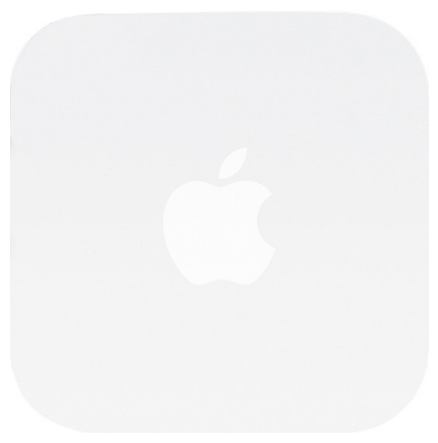

In [37]:
image_path = path_to_images + "9743e6d1c9f3180483825fe4d2e97836.jpg"
img = Image.open(image_path)

plt.imshow(img)
plt.axis('off') 
plt.show()


In [ ]:
#L'image n'a pas de caractéristiques notables (c'est une image plate et pâle), l'extraction SIFT renvoie None

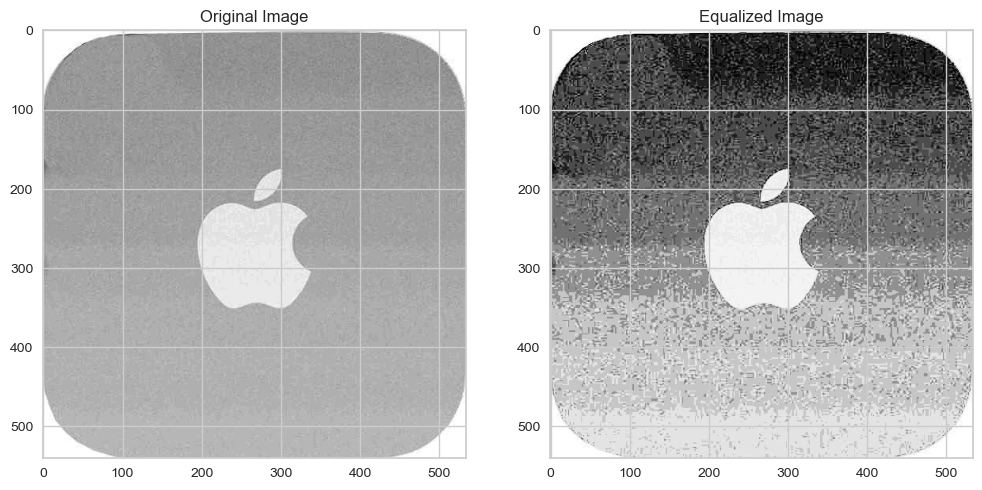

In [38]:
image_path = "./data/source/Flipkart/images/9743e6d1c9f3180483825fe4d2e97836.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

equalized_img = cv2.equalizeHist(img)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(equalized_img, cmap='gray'), plt.title('Equalized Image')
plt.show()


# Créons un "dictionnaire visuel" en utilisant l'algorithme k-means

In [39]:
descriptors_list = []

for descriptor in descriptors.values():
    if descriptor is not None:
        descriptors_list.extend(descriptor)


# Quantification 

In [ ]:
'''
Еnvoyer le dictionnaire visuel à l'algorithme de clustering k-means et 
trouver les mots visuels qui sont des points centraux
'''

In [41]:
wcss = []
K = range(1,10)
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
    kmeans = kmeans.fit(descriptors_list)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)



/Users/innakonar/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/innakonar/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/innakonar/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/innakonar/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_in

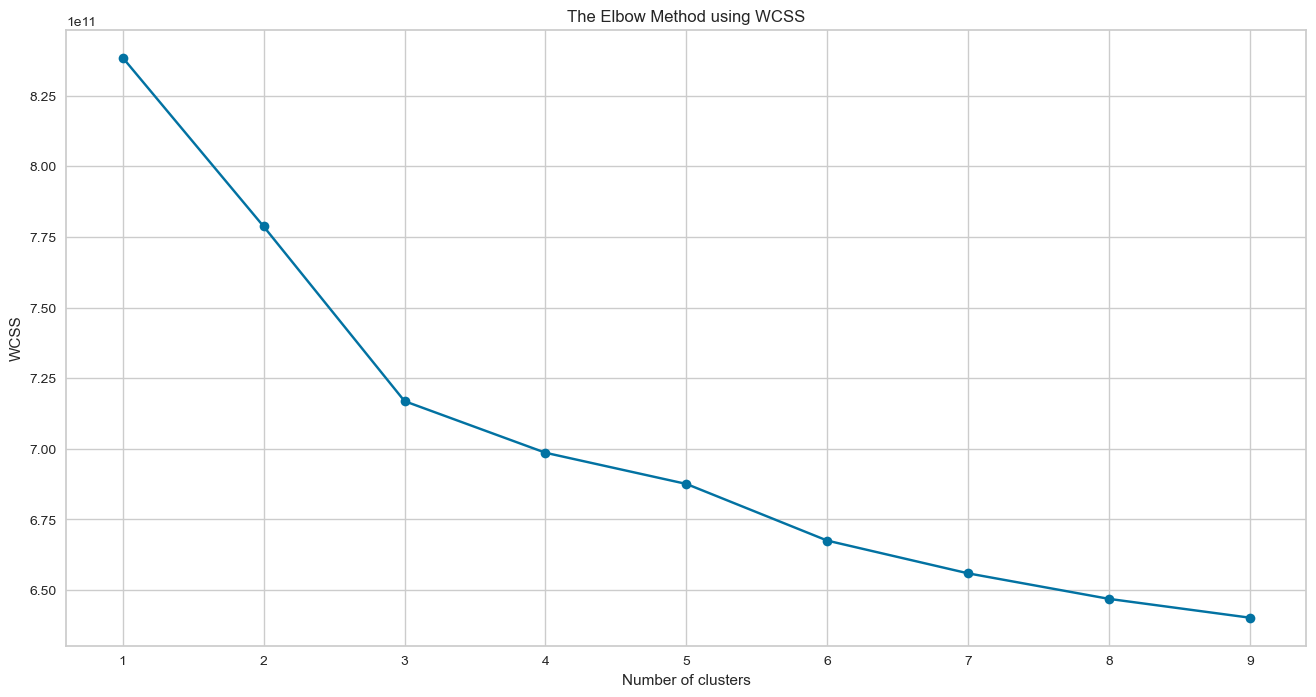

In [42]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method using WCSS')
plt.show()


In [44]:
k = int(round(np.sqrt(len(descriptors_list)), 0))
k

2446

In [48]:
import time

def minibatch_kmeans(k, descriptor_list):
    start_time = time.time()
    
    kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, batch_size=6*k, random_state=0)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_
    
    end_time = time.time()
    duration = end_time - start_time
    print(f"Minibatch KMeans took {duration:.2f} seconds.")
    
    return visual_words




In [49]:
visual_words = minibatch_kmeans(2446, descriptors_list)

/Users/innakonar/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Minibatch KMeans took 158.95 seconds.


def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words

visual_words = kmeans(100, descriptors_list)


In [50]:
visual_words

array([[10.4387284 , 18.84553489, 77.8758739 , ..., 20.28426329,
        82.39585807, 19.26117926],
       [52.81005134, 20.55066198, 10.8334234 , ..., 23.87881654,
        10.84720346, 21.94352878],
       [11.33843301, 10.16458044,  9.31409365, ..., 25.98377376,
        25.92188224, 18.68150209],
       ...,
       [14.24078947, 12.64793233, 13.41503759, ..., 27.43834586,
        10.62330827, 14.51315789],
       [23.27411168,  9.85705584,  8.10375635, ...,  6.60284264,
         6.88527919, 11.40873096],
       [16.33931241, 20.22172397, 24.3756851 , ..., 16.581714  ,
        42.81365222, 55.26133533]])

In [ ]:
def visualize_visual_words_for_image(image_path, visual_words, kmeans):
    img = cv2.imread(image_path)
    kp, des = sift_features_from_path(image_path)

    # Pour chaque descripteur, trouver le mot le plus proche
    labels = kmeans.predict(des)

    # Affichons une image avec les points clés
    for i, keypoint in enumerate(kp):
        label = labels[i]
        cv2.circle(img, (int(keypoint.pt[0]), int(keypoint.pt[1])), int(keypoint.size), colors[label], 2)

    cv2.imshow('Visual Words', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Sélectionnons plusieurs images à afficher
sample_image_paths = [path_to_processed_images + data['image'].iloc[i] for i in range(3)]

colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]  
for image_path in sample_image_paths:
    visualize_visual_words_for_image(image_path, visual_words, kmeans_sift)


# Construction des histogrammes

In [51]:
from scipy.spatial import distance

In [52]:
def find_index(descriptor, centers):
    distances = np.linalg.norm(centers - descriptor, axis=1)
    return np.argmin(distances)
def create_histogram_for_image(descriptors, visual_words):
    histogram = np.zeros(len(visual_words))
    for descriptor in descriptors:
        index = find_index(descriptor, visual_words)
        histogram[index] += 1
    return histogram


In [ ]:
data['histogram'] = data['descriptors'].apply(lambda x: create_histogram_for_image(x, visual_words) if x is not None else np.zeros(len(visual_words)))


In [56]:
data.head()

uniq_id                                 image   
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg  \
1  7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                        product_name          brand   
0  elegance polyester multicolor abstract eyelet ...       elegance  \
1                                  cotton bath towel                  
2                            cotton terry face towel                  
3     royal fashion cotton printed king sized double  royal fashion   
4                    cotton floral king sized double                  

                                         description    main_category   
0  key elegance polyester multicolor abstract eye...  Home Furnishing  \
1  cotton bath towel bath towel red yellow blue b...        Baby Care   
2  key cotton terry face towel size small height ...        Baby Care   
3  key royal fashion cotton printed king sized do...  Home Furnishing   
4  key cotton floral king sized double cotton flo...  Home Furnishing   

            sub_category1     sub_category2   
0  Curtains & Accessories          Curtains  \
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                            combined   
0  elegance polyester abstract eyelet door curtai...  \
1  cotton bath towel cotton bath towel bath towel...   
2  cotton terry face towel cotton terry face towe...   
3  royal fashion cotton printed king sized double...   
4  cotton floral king sized double cotton floral ...   

                                           keypoints   
0  (< cv2.KeyPoint 0x7fa75f636fc0>, < cv2.KeyPoin...  \
1  (< cv2.KeyPoint 0x7fa75f6ce210>, < cv2.KeyPoin...   
2  (< cv2.KeyPoint 0x7fa75efbc630>, < cv2.KeyPoin...   
3  (< cv2.KeyPoint 0x7fa71f019060>, < cv2.KeyPoin...   
4  (< cv2.KeyPoint 0x7fa71f084b10>, < cv2.KeyPoin...   

                                         descriptors   
0  [[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0...  \
1  [[19.0, 8.0, 2.0, 6.0, 17.0, 60.0, 27.0, 14.0,...   
2  [[100.0, 28.0, 0.0, 0.0, 2.0, 3.0, 2.0, 7.0, 1...   
3  [[0.0, 0.0, 0.0, 2.0, 7.0, 2.0, 2.0, 0.0, 2.0,...   
4  [[92.0, 9.0, 8.0, 19.0, 4.0, 0.0, 2.0, 58.0, 1...   

                                           histogram  
0  [0.0, 16.0, 23.0, 6.0, 17.0, 939.0, 0.0, 6.0, ...  
1  [0.0, 31.0, 3.0, 21.0, 16.0, 1.0, 0.0, 0.0, 13...  
2  [0.0, 15.0, 1.0, 1.0, 8.0, 4.0, 1.0, 0.0, 4.0,...  
3  [0.0, 11.0, 6.0, 12.0, 7.0, 2.0, 0.0, 0.0, 2.0...  
4  [0.0, 9.0, 8.0, 3.0, 11.0, 2.0, 0.0, 0.0, 16.0...

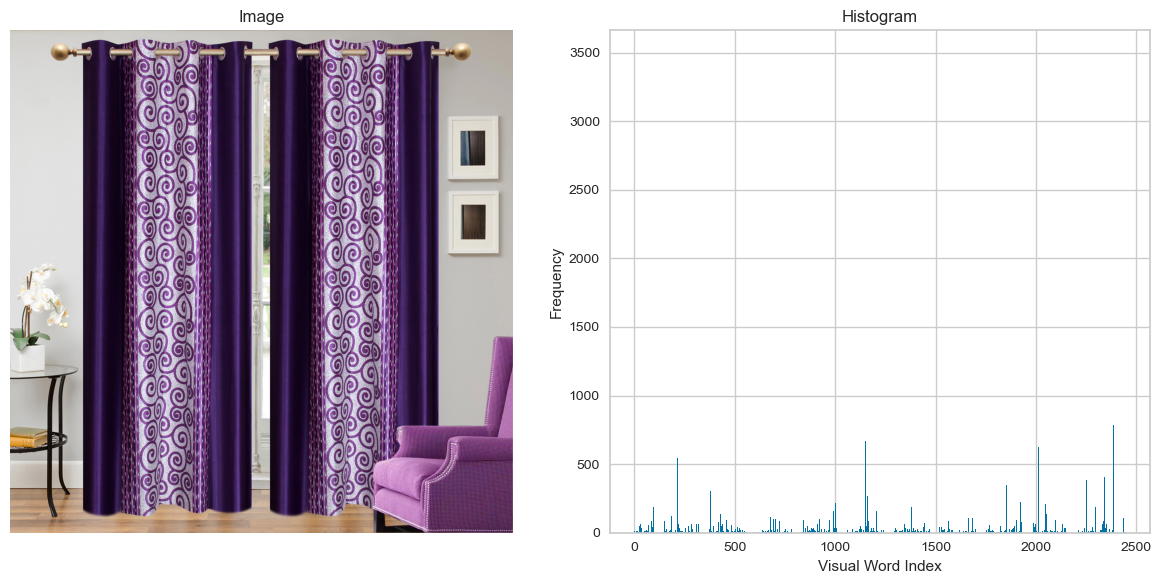

In [57]:
def display_image_and_histogram(image_path, histogram, visual_words):
    
    img = mpimg.imread(image_path)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title("Image")
    
    ax[1].bar(range(len(visual_words)), histogram)
    ax[1].set_title("Histogram")
    ax[1].set_xlabel("Visual Word Index")
    ax[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

image_path = path_to_images + data['image'].iloc[0]
histogram = data['histogram'].iloc[0]

display_image_and_histogram(image_path, histogram, visual_words)


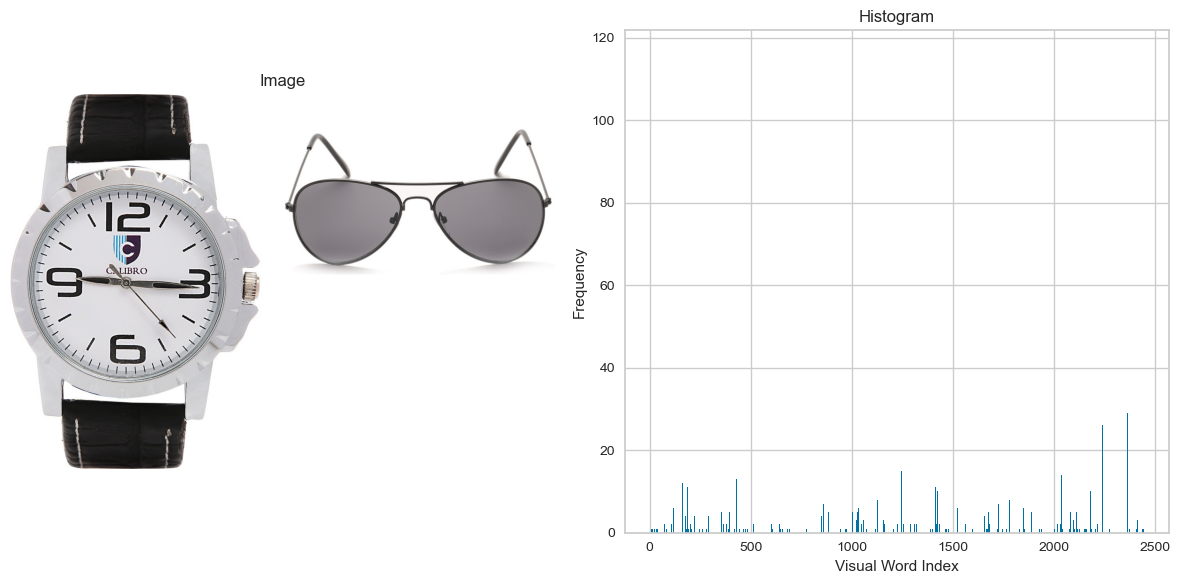

In [58]:
image_path = path_to_images + data['image'].iloc[10]
histogram = data['histogram'].iloc[10]

display_image_and_histogram(image_path, histogram, visual_words)

# Normaliser les histogrammes

In [59]:
def normalize_histogram(histogram):
    total = histogram.sum()
    if total == 0:
        return histogram  
    return histogram / total


In [60]:
data['normalized_histogram'] = data['histogram'].apply(normalize_histogram)


In [62]:
data.head()

uniq_id                                 image   
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg  \
1  7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                        product_name          brand   
0  elegance polyester multicolor abstract eyelet ...       elegance  \
1                                  cotton bath towel                  
2                            cotton terry face towel                  
3     royal fashion cotton printed king sized double  royal fashion   
4                    cotton floral king sized double                  

                                         description    main_category   
0  key elegance polyester multicolor abstract eye...  Home Furnishing  \
1  cotton bath towel bath towel red yellow blue b...        Baby Care   
2  key cotton terry face towel size small height ...        Baby Care   
3  key royal fashion cotton printed king sized do...  Home Furnishing   
4  key cotton floral king sized double cotton flo...  Home Furnishing   

            sub_category1     sub_category2   
0  Curtains & Accessories          Curtains  \
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                            combined   
0  elegance polyester abstract eyelet door curtai...  \
1  cotton bath towel cotton bath towel bath towel...   
2  cotton terry face towel cotton terry face towe...   
3  royal fashion cotton printed king sized double...   
4  cotton floral king sized double cotton floral ...   

                                           keypoints   
0  (< cv2.KeyPoint 0x7fa75f636fc0>, < cv2.KeyPoin...  \
1  (< cv2.KeyPoint 0x7fa75f6ce210>, < cv2.KeyPoin...   
2  (< cv2.KeyPoint 0x7fa75efbc630>, < cv2.KeyPoin...   
3  (< cv2.KeyPoint 0x7fa71f019060>, < cv2.KeyPoin...   
4  (< cv2.KeyPoint 0x7fa71f084b10>, < cv2.KeyPoin...   

                                         descriptors   
0  [[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.0...  \
1  [[19.0, 8.0, 2.0, 6.0, 17.0, 60.0, 27.0, 14.0,...   
2  [[100.0, 28.0, 0.0, 0.0, 2.0, 3.0, 2.0, 7.0, 1...   
3  [[0.0, 0.0, 0.0, 2.0, 7.0, 2.0, 2.0, 0.0, 2.0,...   
4  [[92.0, 9.0, 8.0, 19.0, 4.0, 0.0, 2.0, 58.0, 1...   

                                           histogram   
0  [0.0, 16.0, 23.0, 6.0, 17.0, 939.0, 0.0, 6.0, ...  \
1  [0.0, 31.0, 3.0, 21.0, 16.0, 1.0, 0.0, 0.0, 13...   
2  [0.0, 15.0, 1.0, 1.0, 8.0, 4.0, 1.0, 0.0, 4.0,...   
3  [0.0, 11.0, 6.0, 12.0, 7.0, 2.0, 0.0, 0.0, 2.0...   
4  [0.0, 9.0, 8.0, 3.0, 11.0, 2.0, 0.0, 0.0, 16.0...   

                                normalized_histogram  
0  [0.0, 0.0001719986240110079, 0.000247248022015...  
1  [0.0, 0.0012168792934249264, 0.000117762512266...  
2  [0.0, 0.0019477989871445266, 0.000129853265809...  
3  [0.0, 0.001145713988126237, 0.0006249349026143...  
4  [0.0, 0.00034745010230475236, 0.00030884453538...

#  Standardiser les données

In [65]:
histograms_list = list(data['normalized_histogram'])

scaler = StandardScaler()
scaled_histograms = scaler.fit_transform(histograms_list)


# PCA

In [76]:
pca = PCA()
pca.fit(scaled_histograms)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(cumulative_explained_variance > 0.95)[0][0]+1


In [77]:
n_components

611

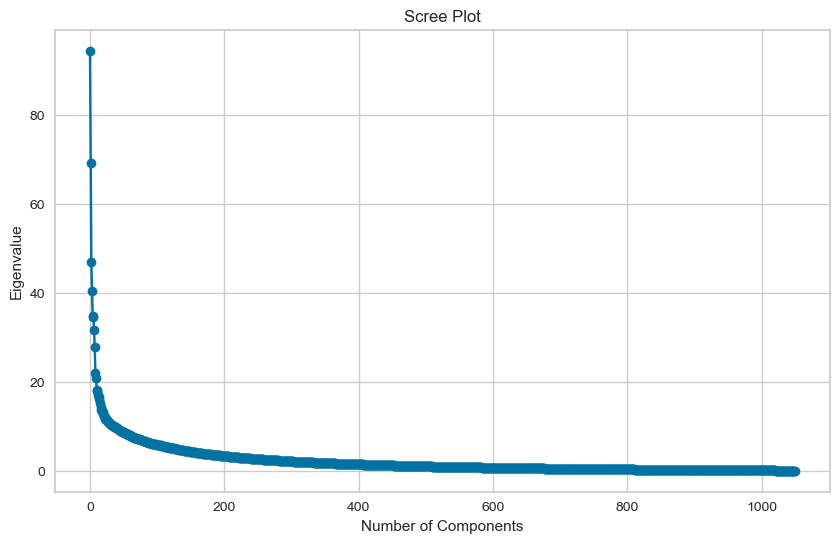

In [67]:
plt.figure(figsize=(10,6))
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


In [82]:
#  PCA
n_components = 611 
pca = PCA(n_components=n_components)
reduced_histograms = pca.fit_transform(scaled_histograms)

# Apport de chaque composant:
explained_variance = pca.explained_variance_ratio_
explained_variance



array([0.03856342, 0.02829451, 0.01914428, 0.01647119, 0.01419897,
       0.01409191, 0.0129061 , 0.01134843, 0.00901144, 0.00852712,
       0.00744631, 0.00735311, 0.00693341, 0.00678826, 0.00658819,
       0.00620061, 0.00583518, 0.00556413, 0.00550072, 0.00538973,
       0.00523485, 0.00498804, 0.0049767 , 0.00478056, 0.0046536 ,
       0.00463384, 0.00461398, 0.00451496, 0.00445929, 0.00435555,
       0.00431502, 0.0042768 , 0.00423685, 0.00419238, 0.00408845,
       0.00408153, 0.00405845, 0.00399359, 0.00397018, 0.00392241,
       0.00388263, 0.00385385, 0.00383821, 0.00375751, 0.00369798,
       0.00365214, 0.00364833, 0.00361924, 0.00358498, 0.00354486,
       0.00352866, 0.00349644, 0.00346336, 0.00343694, 0.00338778,
       0.00338428, 0.00333353, 0.00330481, 0.00329533, 0.0032404 ,
       0.00320363, 0.0031758 , 0.00315118, 0.00312341, 0.00310678,
       0.00303868, 0.00302618, 0.003008  , 0.00299653, 0.0029704 ,
       0.00294397, 0.0029306 , 0.00291461, 0.00289914, 0.00286

In [113]:
scaled_histograms.shape

(1050, 2446)

In [112]:
reduced_histograms.shape

(1050, 611)

In [83]:
explained_variance_for_611 = np.sum(explained_variance[:611])
explained_variance_for_611

0.9491189708265166

# KMeans et T-SNE 

In [95]:
# 1. Obtention d'étiquettes de cluster pour les histogrammes

kmeans = KMeans(n_clusters=7,  n_init=10).fit(reduced_histograms)
cluster_labels = kmeans.labels_

# 2. T-SNE 
tsne = TSNE(n_components=2, random_state=42)

histograms_array = np.array(reduced_histograms)
reduced_features = tsne.fit_transform(histograms_array)





In [114]:
reduced_features.shape

(1050, 2)

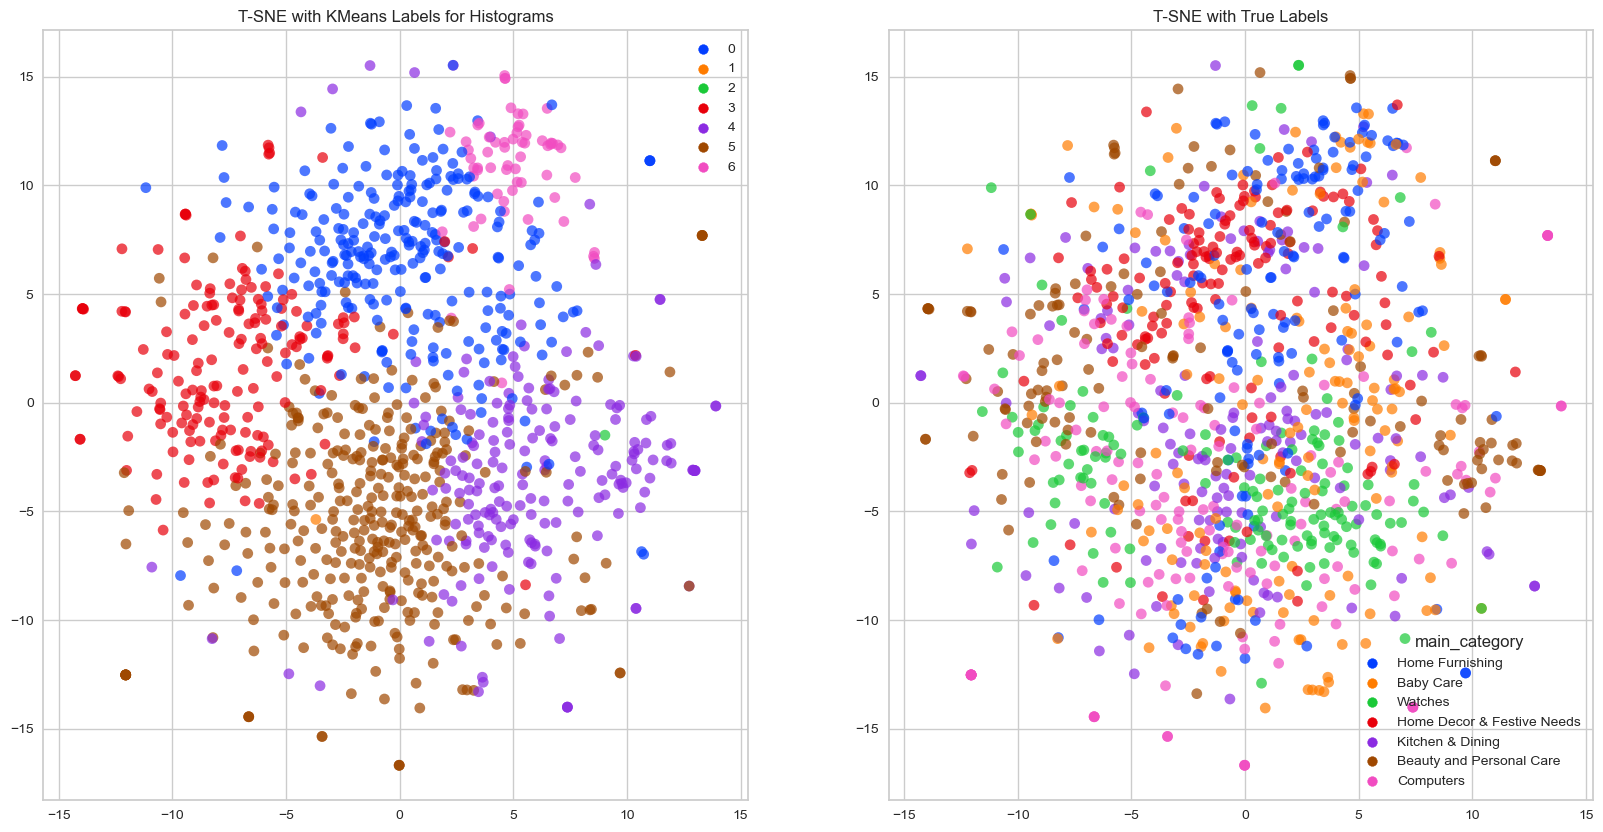

In [117]:
plt.figure(figsize=(20, 10))

# Visualization of KMeans Labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_features[:,0], y=reduced_features[:,1], hue=cluster_labels, palette=palette, s=60, edgecolor='none', alpha=0.7)
plt.title('T-SNE with KMeans Labels for Histograms')

# Visualization of Real Labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_features[:,0], y=reduced_features[:,1], hue=data['main_category'], palette=palette, s=60, edgecolor='none', alpha=0.7)
plt.title('T-SNE with True Labels')

plt.show()


# Nous codons les étiquettes en valeurs numériques

In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['main_category'])


In [85]:
from sklearn.model_selection import train_test_split

X = reduced_histograms 
y = y_encoded  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# RandomForestClassifier

In [98]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.4238095238095238
              precision    recall  f1-score   support

           0       0.38      0.37      0.38        27
           1       0.37      0.62      0.46        21
           2       0.58      0.39      0.47        38
           3       0.45      0.57      0.50        30
           4       0.43      0.34      0.38        35
           5       0.23      0.23      0.23        26
           6       0.52      0.48      0.50        33

    accuracy                           0.42       210
   macro avg       0.42      0.43      0.42       210
weighted avg       0.44      0.42      0.42       210



In [99]:
tsne = TSNE(n_components=2, random_state=42)
X_test_reduced = tsne.fit_transform(X_test)


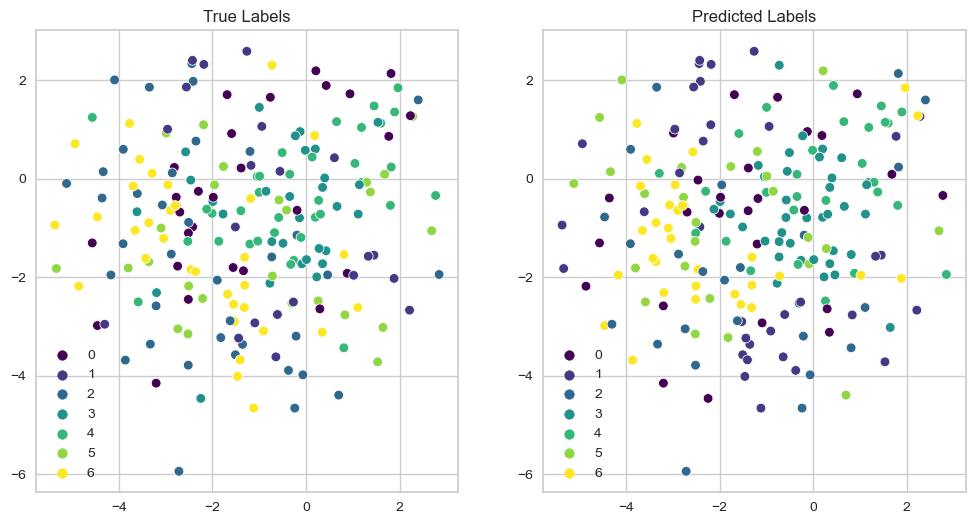

In [100]:
# Corrected visualization code
plt.figure(figsize=(12,6))

# Visualization of true labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_reduced[:, 0], y=X_test_reduced[:, 1], hue=y_test, palette='viridis', legend='full')
plt.title('True Labels')

# Visualization of predicted labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_reduced[:, 0], y=X_test_reduced[:, 1], hue=y_pred, palette='viridis', legend='full')
plt.title('Predicted Labels')

plt.show()


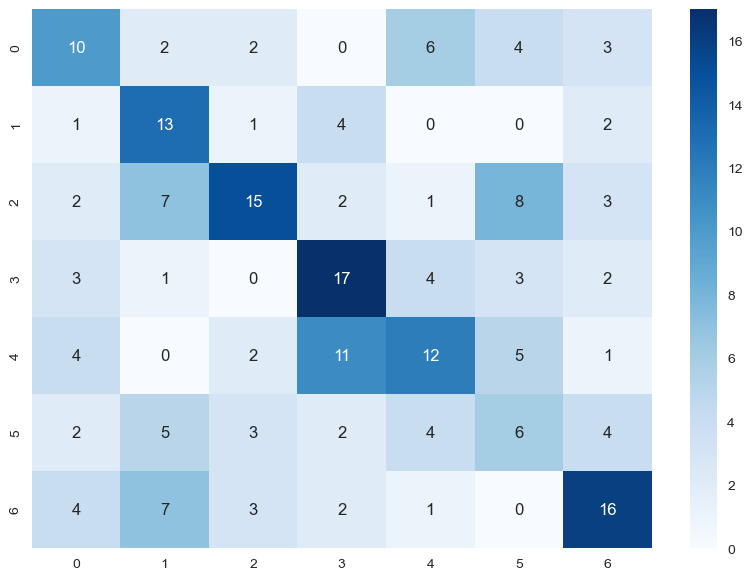

In [102]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.show()


# SVM

In [272]:
svm = SVC(kernel='linear', C=1)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVM:", accuracy)


Accuracy SVM: 0.49047619047619045


In [273]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.49047619047619045
              precision    recall  f1-score   support

           0       0.41      0.70      0.52        27
           1       0.40      0.57      0.47        21
           2       0.44      0.37      0.40        38
           3       0.55      0.57      0.56        30
           4       0.75      0.43      0.55        35
           5       0.40      0.23      0.29        26
           6       0.56      0.61      0.58        33

    accuracy                           0.49       210
   macro avg       0.50      0.50      0.48       210
weighted avg       0.51      0.49      0.48       210



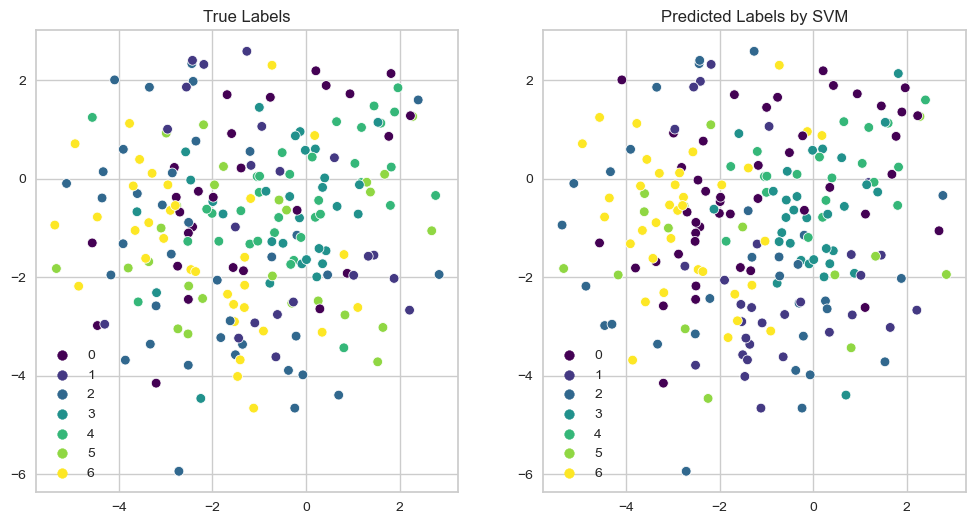

In [104]:
# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_test_reduced = tsne.fit_transform(X_test)

plt.figure(figsize=(12,6))

# Visualization of true labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_reduced[:, 0], y=X_test_reduced[:, 1], hue=y_test, palette='viridis', legend='full')
plt.title('True Labels')

# Visualization of predicted labels by SVC
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_reduced[:, 0], y=X_test_reduced[:, 1], hue=y_pred, palette='viridis', legend='full')
plt.title('Predicted Labels by SVM')

plt.show()


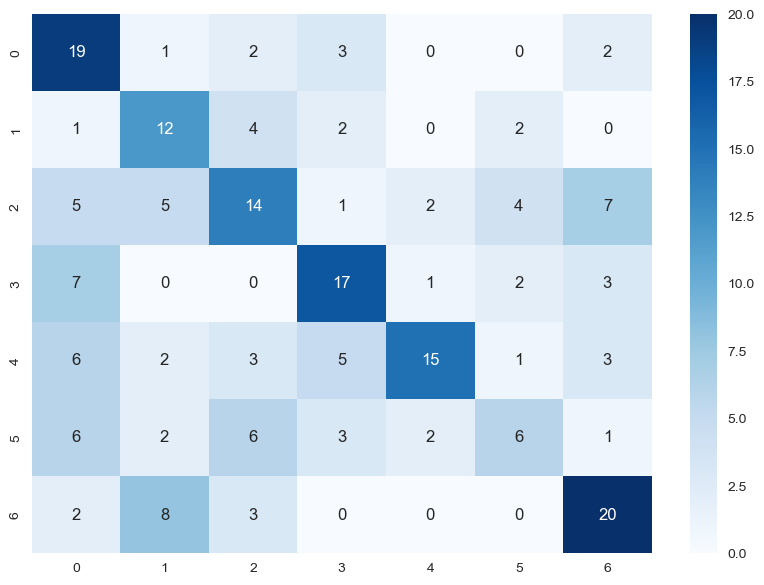

In [105]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.show()